In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pickle
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout, LSTM
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
data_folder = '/content/gdrive/MyDrive/University/master/term1/Machine-Learning/ML-Project/Data/chroma/'

In [4]:
SHAPE_SIZE = (862, 48)

In [5]:
file_name  = data_folder + "chromaaudio_chroma_features_48_all_20Sec_cleaned.pkl"
file_name_labels  = data_folder + "chromaaudio_chroma_features_48_all_20Sec_labels_cleaned.pkl"
with open(file_name, 'rb') as file:
    uncleaned_data = pickle.load(file)

with open(file_name_labels, 'rb') as file:
    uncleaned_labels = pickle.load(file)
np.shape(uncleaned_data), np.shape(uncleaned_labels)

((9538, 862, 48), (9538,))

In [6]:
np.shape(uncleaned_data[0])

(862, 48)

In [7]:
data = []
labels = []
for k, j in zip(uncleaned_data,uncleaned_labels):
    if np.shape(k) != SHAPE_SIZE:
        print(np.shape(k))
    else:
        data.append(k)
        labels.append(j)
labels = np.array(labels)
data = np.array(data)
np.shape(data), np.shape(labels)

((9538, 862, 48), (9538,))

In [8]:
np.unique(uncleaned_labels)

array([0, 1, 2, 3, 4, 5, 6])

In [9]:
import numpy
a = numpy.array(uncleaned_labels)
unique, counts = numpy.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 1254, 1: 1264, 2: 1432, 3: 1476, 4: 1215, 5: 1514, 6: 1383}

In [10]:
labels = to_categorical(labels)
x_train, x_test, y_train, y_test =  train_test_split(data, labels, test_size=0.2, shuffle=True, random_state=42, stratify=labels)

In [11]:
uncleaned_data = []
uncleaned_labels = []
data = []
labels = []

In [12]:
np.shape(x_train), np.shape(y_train)

((7630, 862, 48), (7630, 7))

In [13]:
class Trainer:
    def __init__(self, x_train, y_train, number_of_class=7 ,input_size=None, epochs=1000, optimizer='adam'):
        self.input_size = input_size
        self.model = Sequential()
        self.x_train, self.y_train = x_train, y_train
        self.epochs = epochs
        self.optimizer = optimizer
        self.number_of_class = number_of_class
        self.callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=80)
    # define cnn model
    def define_model(self):
        print("Build LSTM RNN model ...")
        self.model = Sequential()

        self.model.add(LSTM(units=128, dropout=0.5, return_sequences=True, input_shape=self.input_size))
        self.model.add(LSTM(units=32,  dropout=0.5, return_sequences=False))
        self.model.add(Dense(units=self.number_of_class, activation="softmax"))
        self.model.compile(optimizer=self.optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
        return self.model.summary()

    def fit_model(self):
        # fit model
        self.history = self.model.fit(self.x_train, self.y_train, epochs=self.epochs, batch_size=128,
                                      validation_split=0.2, verbose=1,shuffle=True, 
                                      callbacks=[self.callback])

    def plot_history(self):
        fig = plt.figure(figsize=(12, 4))
        metrics = ['loss', 'accuracy']
        for n, metric in enumerate(metrics):
            plt.subplot(1, 2, n + 1)
            plt.plot(self.history.epoch, self.history.history[metric], label='Train')
            plt.plot(self.history.epoch, self.history.history[f"val_{metric}"], linestyle="--", label='Validation')
            plt.xlabel('Epoch')
            plt.ylabel(metric)
            plt.title(metric)
        plt.legend()
        plt.show()

    def evaluate(self, x_test, y_test):
        y_pred = np.argmax(self.model.predict(x_test), axis=-1)
        print(classification_report(np.argmax(y_test, axis=-1), y_pred, digits=3))



In [14]:
trainer = Trainer(x_train, y_train, input_size = SHAPE_SIZE, epochs=1000)
trainer.define_model()

Build LSTM RNN model ...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 862, 128)          90624     
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 7)                 231       
                                                                 
Total params: 111,463
Trainable params: 111,463
Non-trainable params: 0
_________________________________________________________________


In [15]:
trainer.fit_model()

Epoch 1/1000
48/48 [==============================] - 14s 126ms/step - loss: 1.9199 - accuracy: 0.2067 - val_loss: 1.8820 - val_accuracy: 0.2412
Epoch 2/1000
48/48 [==============================] - 4s 92ms/step - loss: 1.8705 - accuracy: 0.2466 - val_loss: 1.8493 - val_accuracy: 0.2693
Epoch 3/1000
48/48 [==============================] - 4s 93ms/step - loss: 1.8408 - accuracy: 0.2629 - val_loss: 1.8338 - val_accuracy: 0.2680
Epoch 4/1000
48/48 [==============================] - 5s 97ms/step - loss: 1.8377 - accuracy: 0.2641 - val_loss: 1.8101 - val_accuracy: 0.2890
Epoch 5/1000
48/48 [==============================] - 4s 93ms/step - loss: 1.8893 - accuracy: 0.2354 - val_loss: 1.8452 - val_accuracy: 0.2661
Epoch 6/1000
48/48 [==============================] - 5s 97ms/step - loss: 1.8337 - accuracy: 0.2751 - val_loss: 1.8144 - val_accuracy: 0.2837
Epoch 7/1000
48/48 [==============================] - 5s 97ms/step - loss: 1.8106 - accuracy: 0.2949 - val_loss: 1.8188 - val_accuracy: 0.27

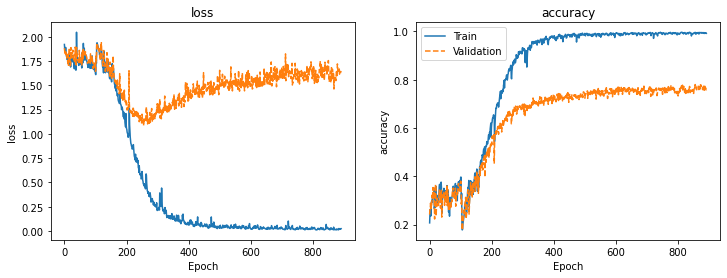

In [16]:
trainer.plot_history()

In [17]:
trainer.evaluate(x_test, y_test)

60/60 [==============================] - 2s 24ms/step
              precision    recall  f1-score   support

           0      0.644     0.729     0.684       251
           1      0.817     0.779     0.798       253
           2      0.752     0.752     0.752       286
           3      0.819     0.658     0.729       295
           4      0.657     0.724     0.689       243
           5      0.756     0.766     0.761       303
           6      0.856     0.881     0.868       277

    accuracy                          0.755      1908
   macro avg      0.757     0.755     0.754      1908
weighted avg      0.760     0.755     0.756      1908



In [18]:
trainer.evaluate(x_train, y_train)

239/239 [==============================] - 6s 26ms/step
              precision    recall  f1-score   support

           0      0.932     0.949     0.940      1003
           1      0.967     0.955     0.961      1011
           2      0.948     0.962     0.955      1146
           3      0.956     0.920     0.937      1181
           4      0.926     0.933     0.930       972
           5      0.951     0.955     0.953      1211
           6      0.957     0.965     0.961      1106

    accuracy                          0.948      7630
   macro avg      0.948     0.948     0.948      7630
weighted avg      0.949     0.948     0.948      7630

